<a href="https://colab.research.google.com/github/MStamirski/Optic-sensors/blob/main/ModelsWater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data and functions for training and testing models

In [1]:
from google.colab import drive
drive.mount("/content/drive")
path = "drive/MyDrive/Colab_Notebooks/SDA_Upskill/"

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

In [4]:
df_water = pd.read_csv(path+"water.csv", sep="\t").iloc[:, 1:] # without index
df_water

,X1,X2,y
0,0.000001,9.1792,8.35700
1,0.000001,9.2003,8.42870
2,0.000001,9.1968,8.44220
3,0.000001,9.1028,8.41440
4,0.000001,9.0601,8.40340
...,...,...,...
30005,0.000002,3.2784,-0.86565
30006,0.000002,3.4213,-0.84435
30007,0.000002,3.3112,-0.97383
30008,0.000002,3.4500,-0.63849


In [6]:
def train_model(df):
  X = df[df.columns[:2]]
  y = df[df.columns[2]]

  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

  X_train_sc = scaler.fit_transform(X_train)
  X_test_sc = scaler.transform(X_test)
  
  model.fit(X_train_sc, y_train)

  return X_test_sc, y_test

In [7]:
def make_prediction(X_test_sc, y_test):
  y_pred = model.predict(X_test_sc)

  print(f"MAE OF PREDICTION  (dB)  : {round(mean_absolute_error(y_test, y_pred),4)}")
  print(f"MAPE OF PREDICTION (%)   : {round(mean_absolute_percentage_error(y_test, y_pred),4)}")

In [8]:
def get_sensor_data(filename):
  records = []

  with open(path+"data/"+filename+".txt") as file:
    for data in file:
      record = data.strip().split(',')
      records.append(record)
  
  df = pd.DataFrame.from_records(records,columns=['X1', 'X2'])
  df['X1'] = df['X1'].astype('float')
  df['X2'] = df['X2'].astype('float')

  return df

In [9]:
def plot_water_comparison():

  sensor_nbrs = [str(sens).zfill(2) for sens in range(1,11)]
  filenames_a = []
  filenames_w = []
  for sensor in sensor_nbrs:
    filename_a = "sensor"+sensor+"_air"
    filenames_a.append(filename_a)
    filename_w = "sensor"+sensor+"_water"
    filenames_w.append(filename_w)
  
  dframes_a = []
  for filename in filenames_a:
    df = get_sensor_data(filename)
    dframes_a.append(df)

  dframes_w = []
  for filename in filenames_w:
    df = get_sensor_data(filename)
    dframes_w.append(df)

  fig, axs = plt.subplots(2,5, figsize=(25,10))
  for i, ax in enumerate(fig.axes):

    A = dframes_a[i]
    A_sc = scaler.transform(A)
    y_pred = model.predict(A_sc) 

    ax.set_title("Water, sensor"+str(i+1).zfill(2))
    ax.plot(dframes_w[i]['X1'], dframes_w[i]['X2'], label = "ground truth", color = "r")
    ax.plot(A['X1'], y_pred, label = "prediction", color = "b")

    ax.legend(loc = "upper center")

  fig.show()

In [10]:
def test_model(df):
  X_test_sc, y_test = train_model(df)
  make_prediction(X_test_sc, y_test)
  plot_water_comparison()

# MLPRegressor - parameters tuning and evaluation

In [11]:
scaler = MinMaxScaler()

In [12]:
model = MLPRegressor(
  hidden_layer_sizes=(10, 2),
  activation='relu',
  solver='adam',
  random_state=42,
  max_iter=300,
  batch_size=60)

MAE OF PREDICTION  (dB)  : 0.2453
MAPE OF PREDICTION (%)   : 0.1714


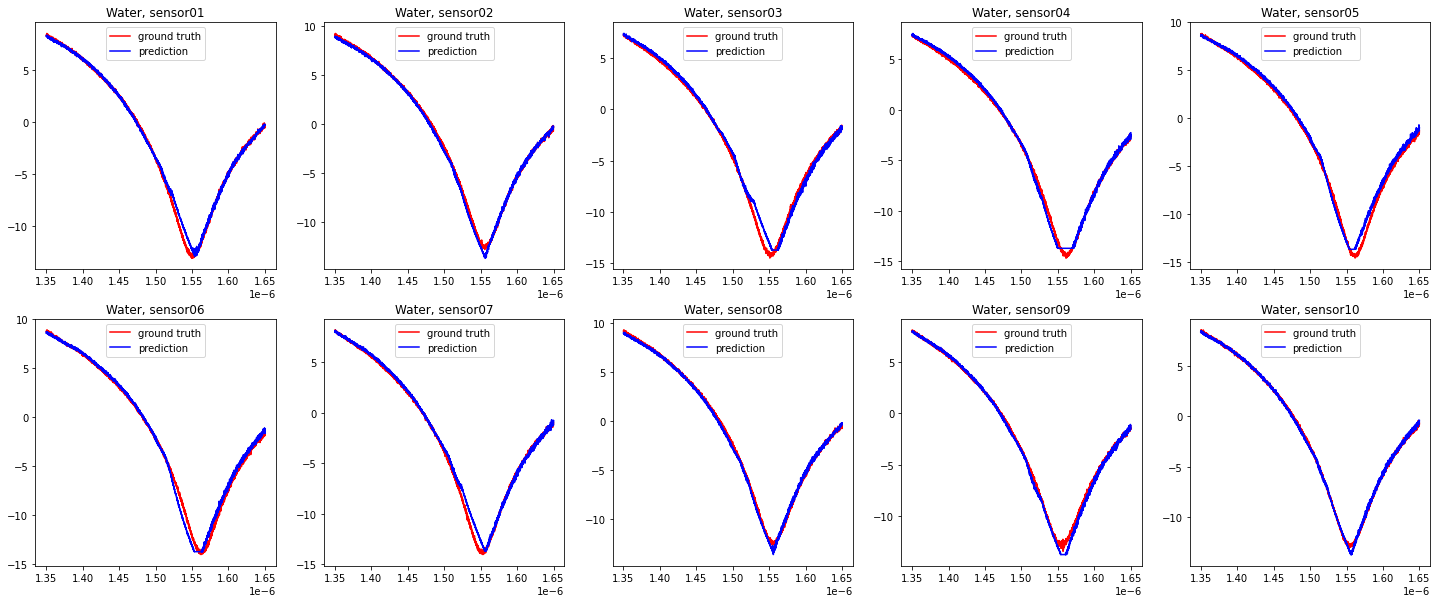

In [13]:
test_model(df_water)

In [14]:
model = MLPRegressor(
  hidden_layer_sizes=(10, 2),
  activation='tanh',
  solver='adam',
  random_state=42,
  max_iter=300,
  batch_size=60)

MAE OF PREDICTION  (dB)  : 0.2583
MAPE OF PREDICTION (%)   : 0.2003


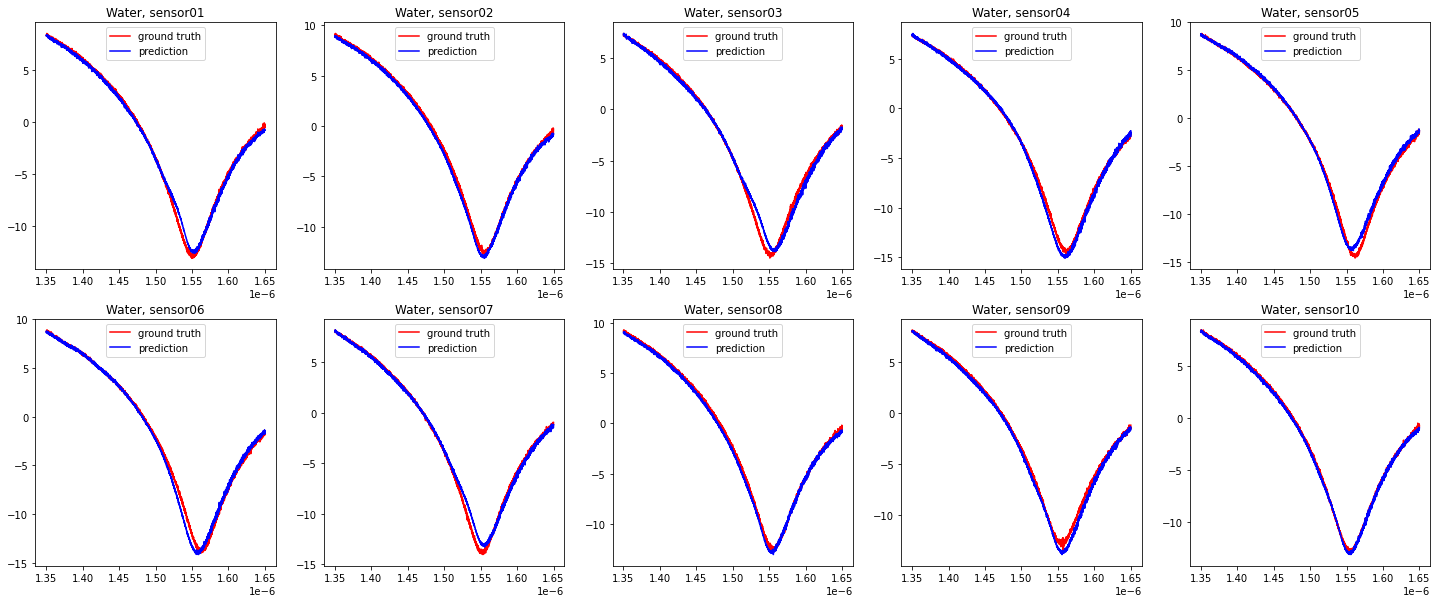

In [15]:
test_model(df_water)

In [16]:
model = MLPRegressor(
  hidden_layer_sizes=(16, 8, 4, 2),
  activation='tanh',
  solver='adam',
  random_state=42,
  max_iter=300,
  batch_size=60)

MAE OF PREDICTION  (dB)  : 0.2299
MAPE OF PREDICTION (%)   : 0.1222


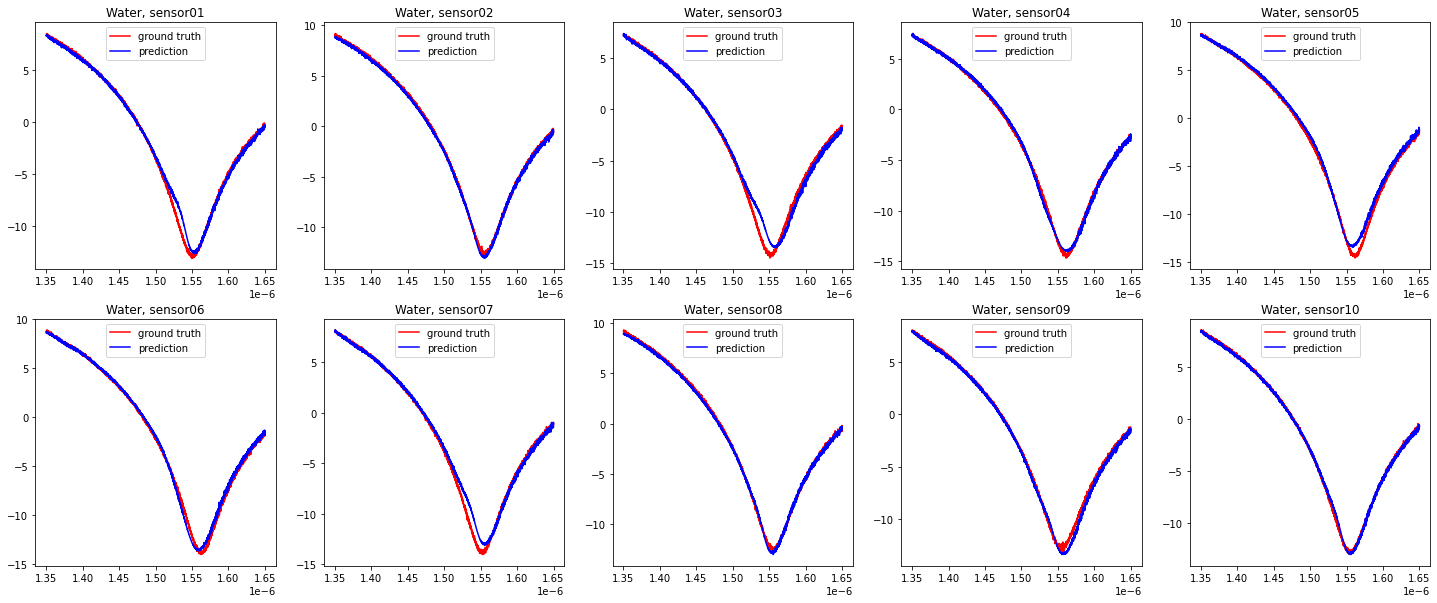

In [17]:
test_model(df_water)

In [18]:
model = MLPRegressor(
  hidden_layer_sizes=(32, 16, 8, 4),
  activation='tanh',
  solver='adam',
  random_state=42,
  max_iter=300,
  batch_size=60)

MAE OF PREDICTION  (dB)  : 0.2276
MAPE OF PREDICTION (%)   : 0.1093


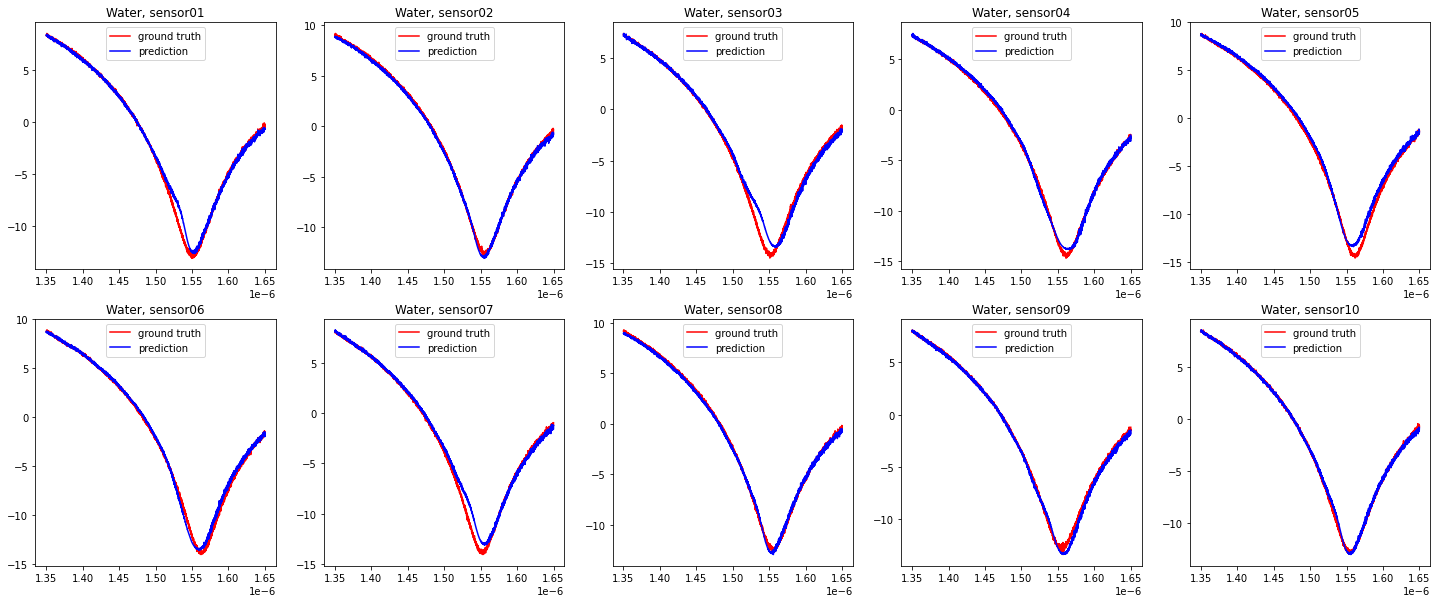

In [19]:
test_model(df_water)

# DecisionTreeRegressor - evaluation

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
model = DecisionTreeRegressor()

MAE OF PREDICTION  (dB)  : 0.2292
MAPE OF PREDICTION (%)   : 0.1117


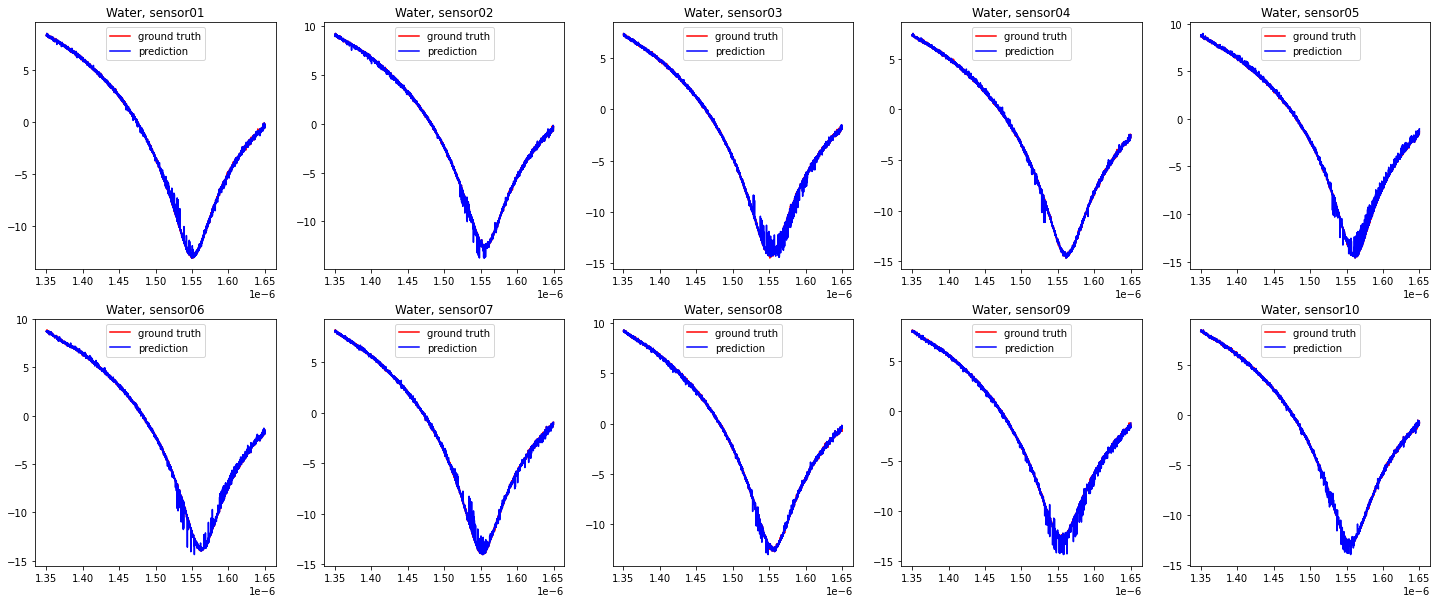

In [22]:
test_model(df_water)

# Sequential - parameters tuning and evaluation

In [23]:
from keras import models
from keras import layers
from keras.layers import Dense

In [24]:
def train_sequential_model(df):
  X = df[df.columns[:2]]
  y = df[df.columns[2]]

  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

  X_train_sc = scaler.fit_transform(X_train)
  X_test_sc = scaler.transform(X_test)
  
  model.fit(X_train_sc, y_train, epochs=20, batch_size=60, validation_data=(X_test_sc, y_test))

  return X_test_sc, y_test

In [25]:
def test_sequential_model(df):
  X_test_sc, y_test = train_sequential_model(df)
  make_prediction(X_test_sc, y_test)
  plot_water_comparison()

In [26]:
model = models.Sequential()
model.add(Dense(32, activation='tanh', input_shape=(2,)))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error', metrics='mae')

Epoch 1/20
401/401 [==============================] - 3s 4ms/step - loss: 3.0988 - mae: 3.0988 - val_loss: 2.2007 - val_mae: 2.2007
Epoch 2/20
401/401 [==============================] - 1s 2ms/step - loss: 1.8686 - mae: 1.8686 - val_loss: 1.5791 - val_mae: 1.5791
Epoch 3/20
401/401 [==============================] - 1s 2ms/step - loss: 1.4631 - mae: 1.4631 - val_loss: 1.3129 - val_mae: 1.3129
Epoch 4/20
401/401 [==============================] - 1s 2ms/step - loss: 1.2786 - mae: 1.2786 - val_loss: 1.2052 - val_mae: 1.2052
Epoch 5/20
401/401 [==============================] - 1s 2ms/step - loss: 1.1750 - mae: 1.1750 - val_loss: 1.1182 - val_mae: 1.1182
Epoch 6/20
401/401 [==============================] - 1s 2ms/step - loss: 1.1093 - mae: 1.1093 - val_loss: 1.0887 - val_mae: 1.0887
Epoch 7/20
401/401 [==============================] - 1s 2ms/step - loss: 1.0383 - mae: 1.0383 - val_loss: 1.0181 - val_mae: 1.0181
Epoch 8/20
401/401 [==============================] - 1s 2ms/step - loss: 0.

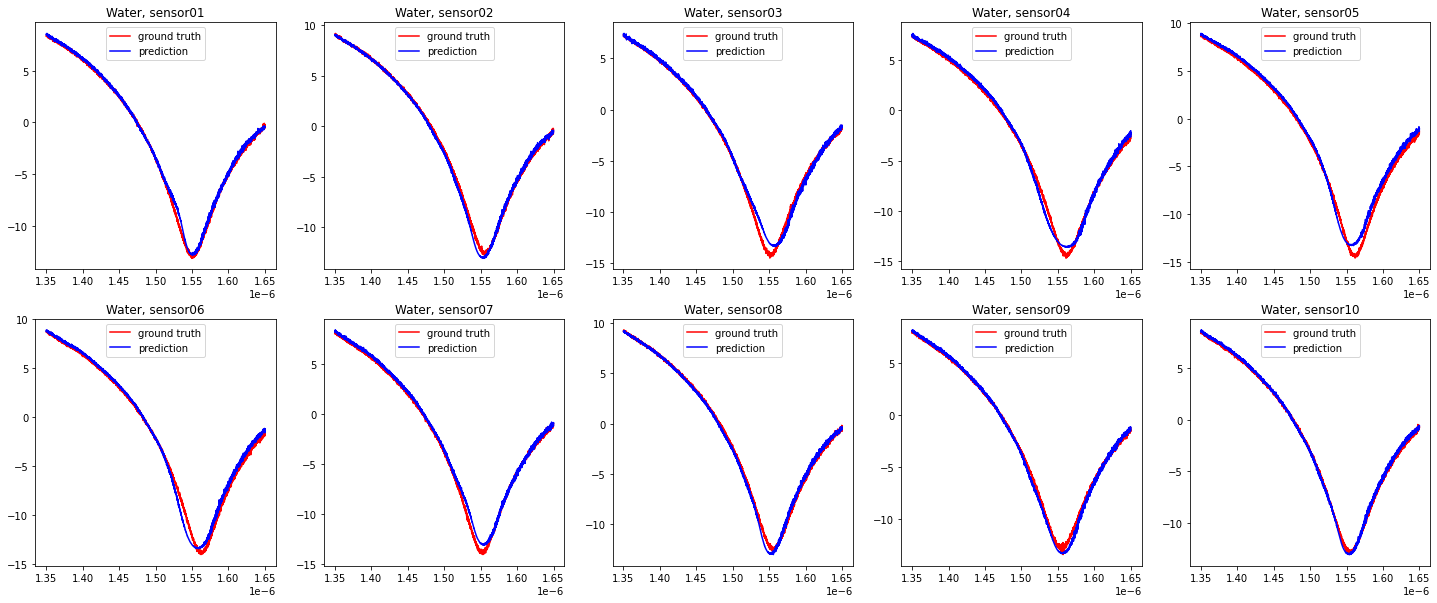

In [27]:
test_sequential_model(df_water)

In [28]:
model = models.Sequential()
model.add(Dense(32, activation='relu', input_shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error', metrics='mae')

Epoch 1/20
401/401 [==============================] - 2s 3ms/step - loss: 2.8978 - mae: 2.8978 - val_loss: 1.3287 - val_mae: 1.3287
Epoch 2/20
401/401 [==============================] - 1s 2ms/step - loss: 1.2325 - mae: 1.2325 - val_loss: 1.1396 - val_mae: 1.1396
Epoch 3/20
401/401 [==============================] - 1s 2ms/step - loss: 1.0819 - mae: 1.0819 - val_loss: 1.0439 - val_mae: 1.0439
Epoch 4/20
401/401 [==============================] - 1s 2ms/step - loss: 1.0342 - mae: 1.0342 - val_loss: 1.0186 - val_mae: 1.0186
Epoch 5/20
401/401 [==============================] - 1s 2ms/step - loss: 1.0079 - mae: 1.0079 - val_loss: 0.9839 - val_mae: 0.9839
Epoch 6/20
401/401 [==============================] - 1s 2ms/step - loss: 0.9730 - mae: 0.9730 - val_loss: 0.9769 - val_mae: 0.9769
Epoch 7/20
401/401 [==============================] - 1s 2ms/step - loss: 0.9271 - mae: 0.9271 - val_loss: 0.8954 - val_mae: 0.8954
Epoch 8/20
401/401 [==============================] - 1s 2ms/step - loss: 0.

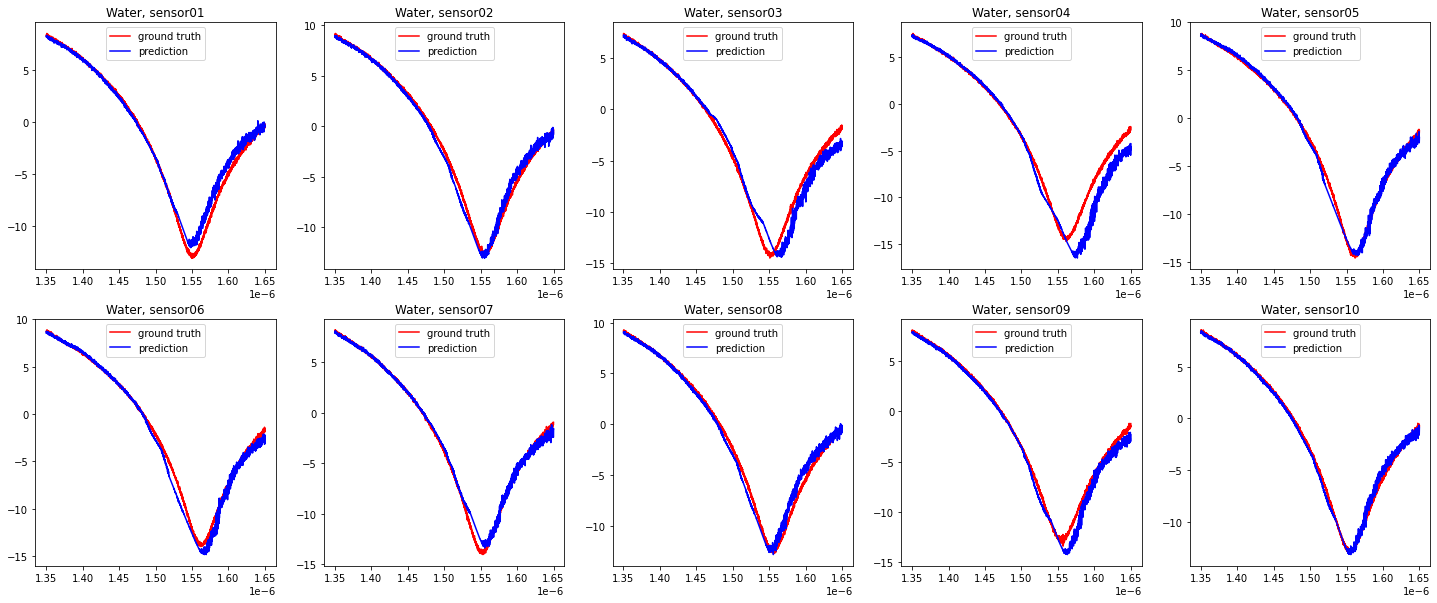

In [29]:
test_sequential_model(df_water)

In [30]:
model = models.Sequential()
model.add(Dense(32, activation='sigmoid', input_shape=(2,)))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error', metrics='mae')

Epoch 1/20
401/401 [==============================] - 1s 3ms/step - loss: 5.7041 - mae: 5.7041 - val_loss: 5.6285 - val_mae: 5.6285
Epoch 2/20
401/401 [==============================] - 1s 2ms/step - loss: 5.0807 - mae: 5.0807 - val_loss: 3.9644 - val_mae: 3.9644
Epoch 3/20
401/401 [==============================] - 1s 2ms/step - loss: 3.4958 - mae: 3.4958 - val_loss: 3.1706 - val_mae: 3.1706
Epoch 4/20
401/401 [==============================] - 1s 2ms/step - loss: 2.9194 - mae: 2.9194 - val_loss: 2.6344 - val_mae: 2.6344
Epoch 5/20
401/401 [==============================] - 1s 2ms/step - loss: 2.4208 - mae: 2.4208 - val_loss: 2.1793 - val_mae: 2.1793
Epoch 6/20
401/401 [==============================] - 1s 2ms/step - loss: 2.0360 - mae: 2.0360 - val_loss: 1.8584 - val_mae: 1.8584
Epoch 7/20
401/401 [==============================] - 1s 3ms/step - loss: 1.7699 - mae: 1.7699 - val_loss: 1.6365 - val_mae: 1.6365
Epoch 8/20
401/401 [==============================] - 1s 4ms/step - loss: 1.

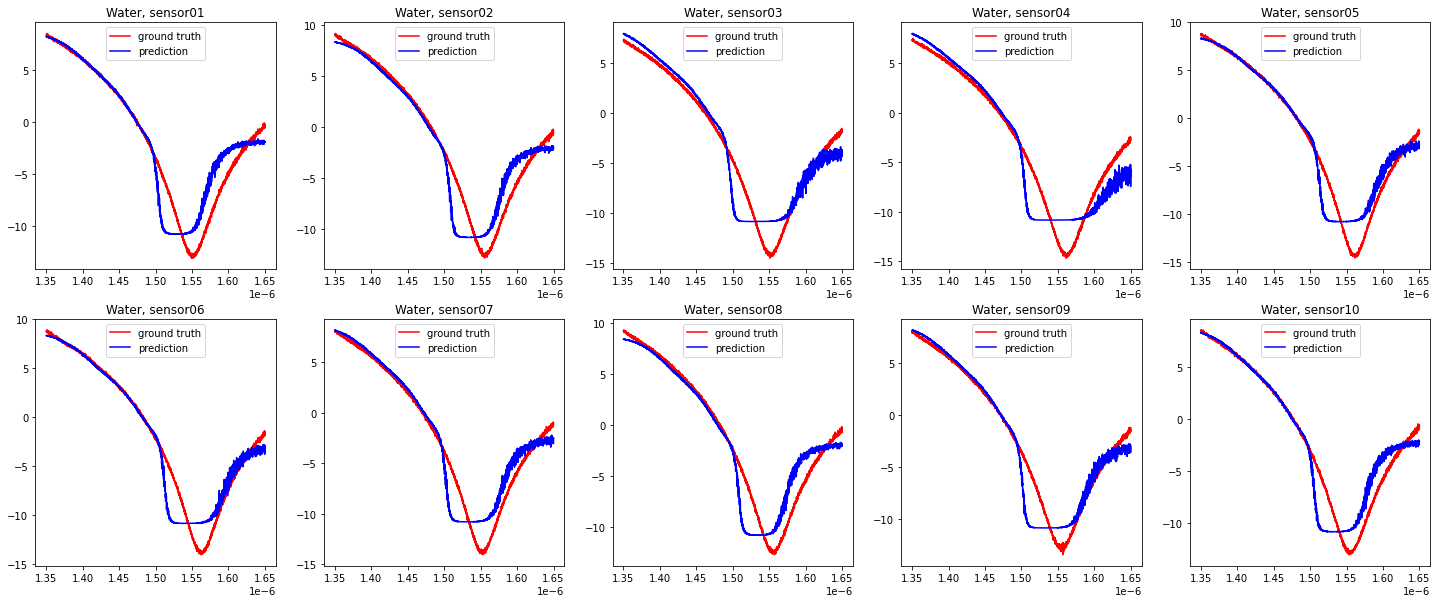

In [31]:
test_sequential_model(df_water)

# Conclusion

**The best model:**

**MLPRegressor, tanh, (32,16,8,4)**